# BIG DATA MART SALES 


## Collecting data

In [440]:
#importing the basic library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn 

import warnings
warnings.filterwarnings('ignore')

In [441]:
#loading the data and displaying tope 5 rows
dftrain=pd.read_csv('bigdatamartsales_train.csv')
dftrain.head()  

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [442]:
#displaying the bottom 5 rows 
dftrain.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


# EXPLORATORY DATA ANALYSIS

In [443]:
#displaying the column names
dftrain.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [444]:
#displaying the number of rows and columns present in our data set
dftrain.shape

(8523, 12)

In [445]:
#displaying the column names and the data type present in there respective column
dtype=dftrain.dtypes
dtype

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [446]:
#counting the data type
dtype.value_counts()

object     7
float64    4
int64      1
dtype: int64

In [447]:
#Dispalying the information of each column
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [448]:
#checking wheather null value is present or not
dftrain.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [449]:
#Checking the value counts of each attribute
for attr in dftrain.columns:
  if dftrain[attr].dtype=='object':
    print(f"=======Column: {attr}=======")
    print('Number of unique values: ',dftrain[attr].nunique())
    print(dftrain[attr].value_counts(),'\n\n')

=======Column: Item_Identifier=======
Number of unique values:  1559
FDW13    10
FDG33    10
FDX31     9
FDU12     9
FDF56     9
         ..
FDT35     1
FDN52     1
FDY43     1
FDQ60     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64 


=======Column: Item_Fat_Content=======
Number of unique values:  5
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


=======Column: Item_Type=======
Number of unique values:  16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, d

In [450]:

#Checking for Max and Min value of each attribute
for column in dftrain.columns:
  if dftrain[column].dtype !='object':
        print(f"=======Column: {column}=======")
        print(f"Number of unique values: {dftrain[column].nunique()}")
        print(f"Max: {dftrain[column].max()}")
        print(f"Min: {dftrain[column].min()}")

=======Column: Item_Weight=======
Number of unique values: 415
Max: 21.35
Min: 4.555
=======Column: Item_Visibility=======
Number of unique values: 7880
Max: 0.328390948
Min: 0.0
=======Column: Item_MRP=======
Number of unique values: 5938
Max: 266.8884
Min: 31.29
=======Column: Outlet_Establishment_Year=======
Number of unique values: 9
Max: 2009
Min: 1985
=======Column: Item_Outlet_Sales=======
Number of unique values: 3493
Max: 13086.9648
Min: 33.29


In [451]:
#Counting the total number of 0 present in column Item_Visibility
sum(dftrain['Item_Visibility']==0)

526

In [452]:
#looking at the statistical information of our data set 
dftrain.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [454]:
#looking at the statistical information of catogorical column
dftrain.describe(include=[object])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [455]:
#displaying the columns which are not object type
a=[]
for i in dftrain.columns:
  if dftrain[i].dtypes!='object':
    a.append(i)
a

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

In [456]:
#displaying the columns which are object type
b=[]
for i in dftrain.columns:
  if dftrain[i].dtypes=='object':
    b.append(i)
b

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

## Univariate analysis

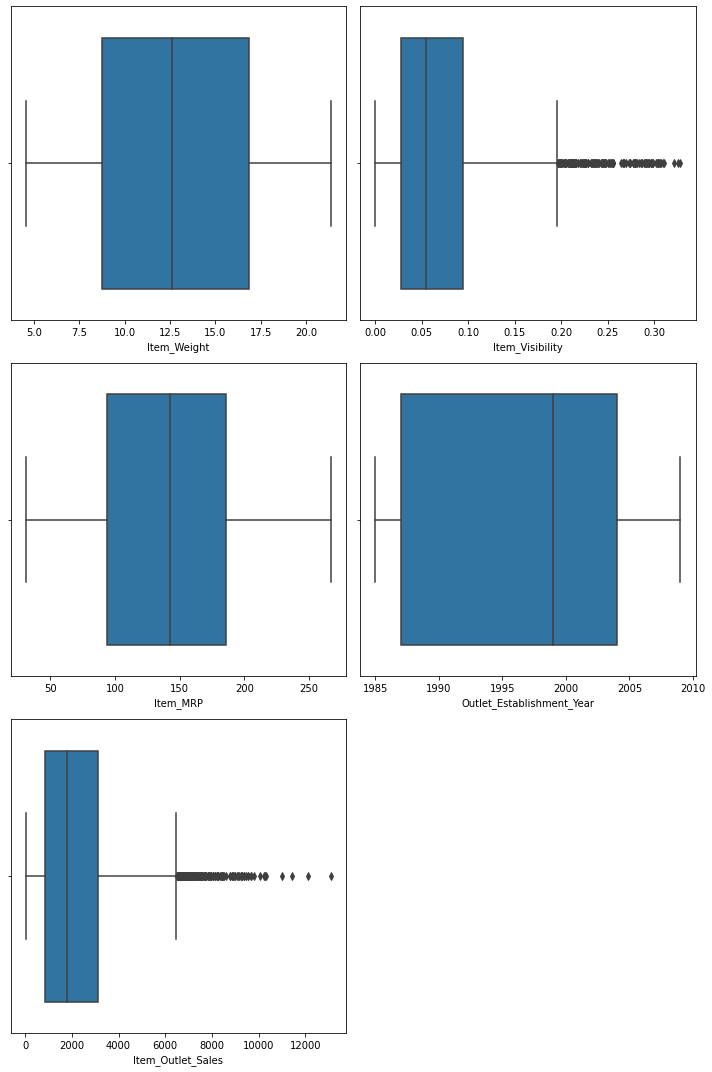

In [457]:
#ploting box plot for all numeric column
plt.figure(figsize=(10,15))
enumerate(a)
for i,col in enumerate(a):
  plt.subplot(3,2,i+1)
  sn.boxplot(x=col,data=dftrain)
  plt.tight_layout()

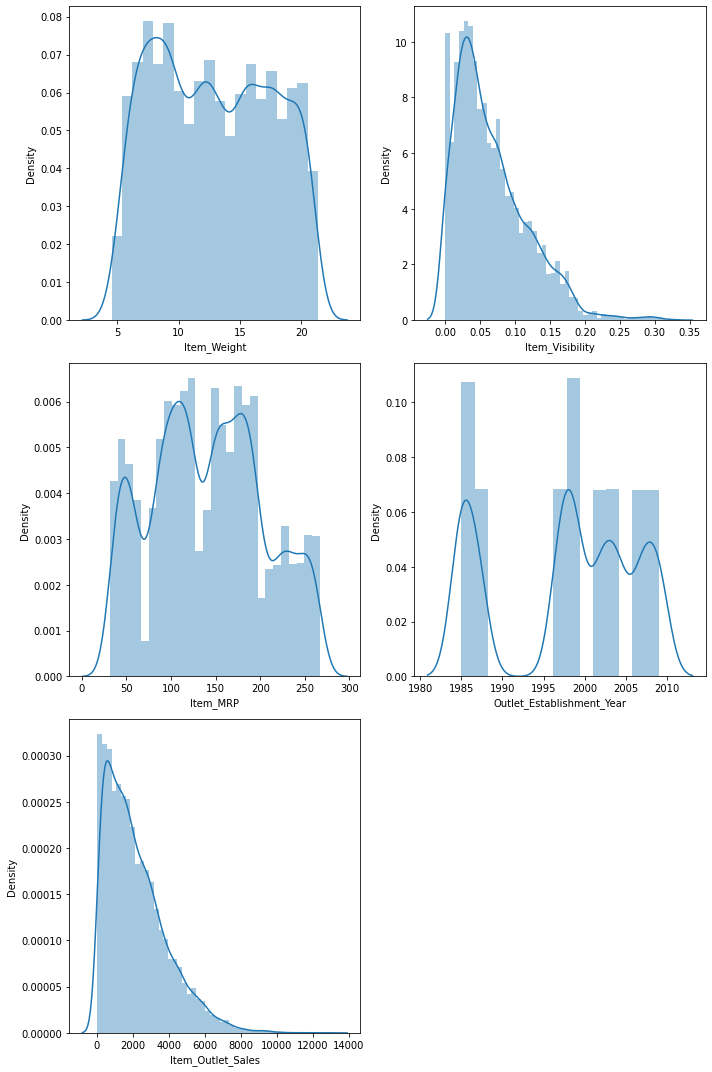

In [458]:
#ploting distribution curve for all the columns
plt.figure(figsize=(10,15))
enumerate(a)
for i,col in enumerate(a):
  plt.subplot(3,2,i+1)
  sn.distplot(dftrain[col])
  plt.tight_layout()

In [ ]:
#ploating countplpot for all column with object data type

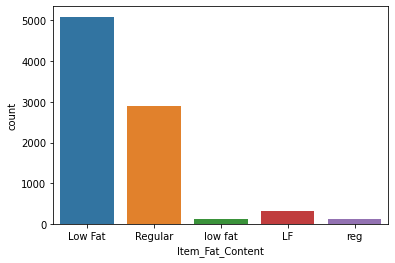

In [459]:
sn.countplot(dftrain['Item_Fat_Content'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

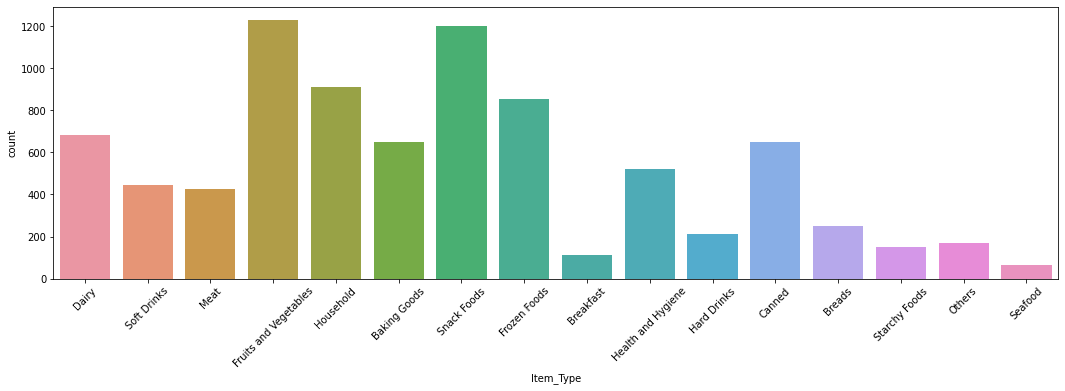

In [460]:
plt.figure(figsize=(18,5))
sn.countplot(dftrain['Item_Type'])
plt.xticks(rotation=45)

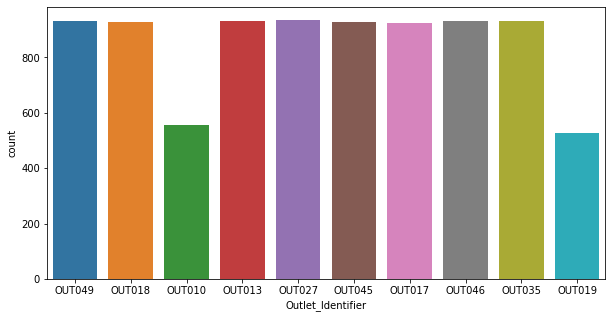

In [461]:
plt.figure(figsize=(10,5))
sn.countplot(dftrain['Outlet_Identifier'])

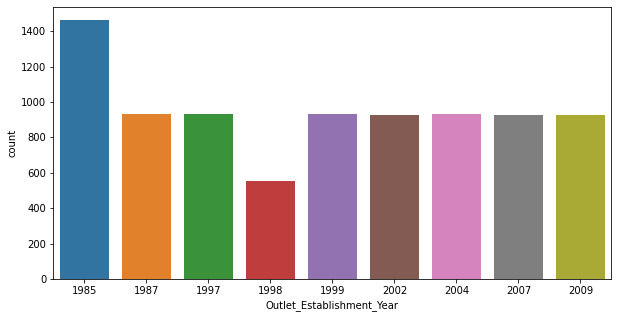

In [462]:
plt.figure(figsize=(10,5))
sn.countplot(dftrain['Outlet_Establishment_Year'])

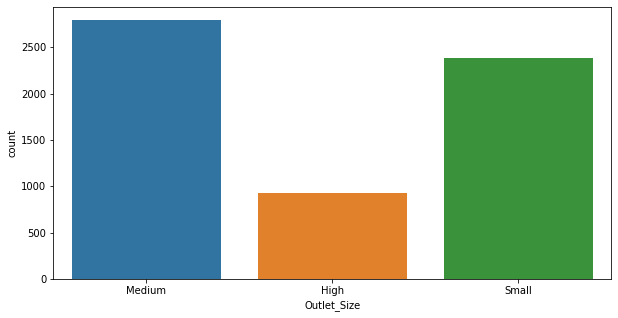

In [463]:
plt.figure(figsize=(10,5))
sn.countplot(dftrain['Outlet_Size'])

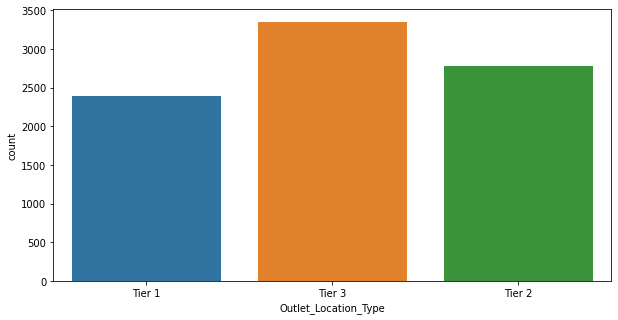

In [464]:
plt.figure(figsize=(10,5))
sn.countplot(dftrain['Outlet_Location_Type'])

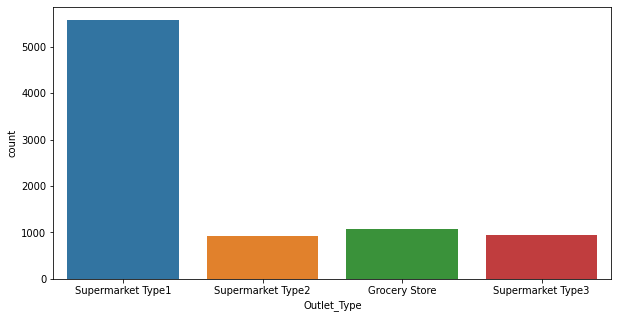

In [465]:
plt.figure(figsize=(10,5))
sn.countplot(dftrain['Outlet_Type'])

## Bivariate analysis

In [ ]:
#ploating countplpot for all column without object data type

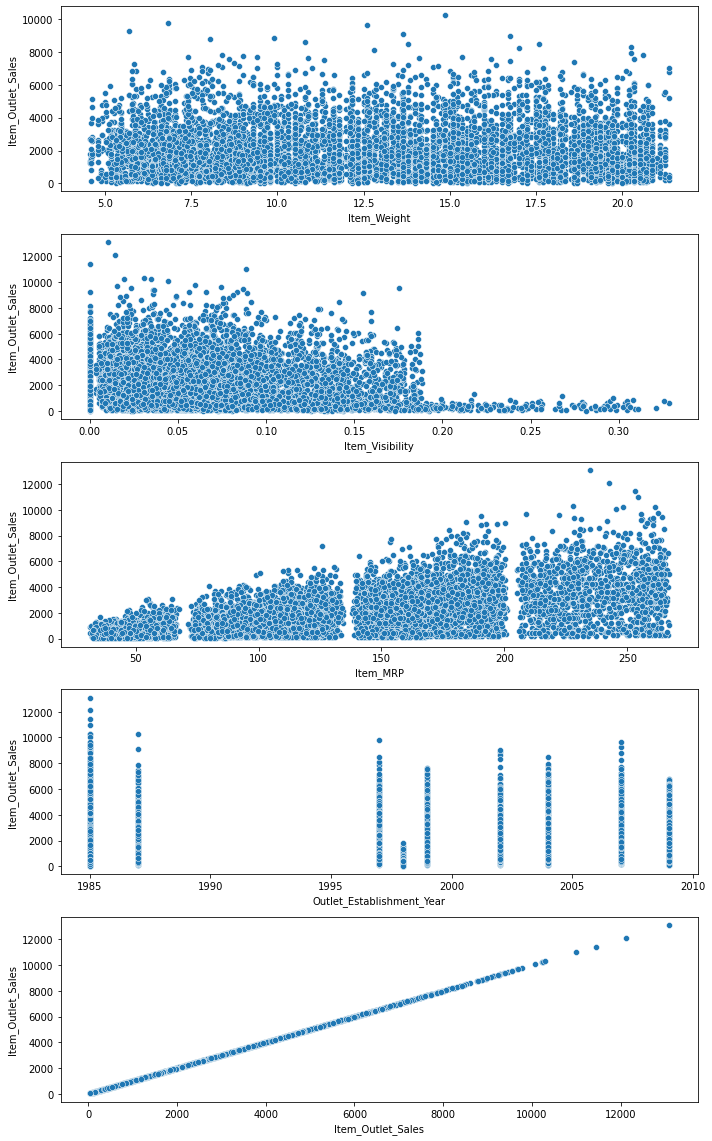

In [466]:
 
plt.figure(figsize=(10,25))
enumerate(a)
for i,col in enumerate(a):
    plt.subplot(8,1,i+1)
    sn.scatterplot(x=col,y='Item_Outlet_Sales',data=dftrain)
    plt.tight_layout()

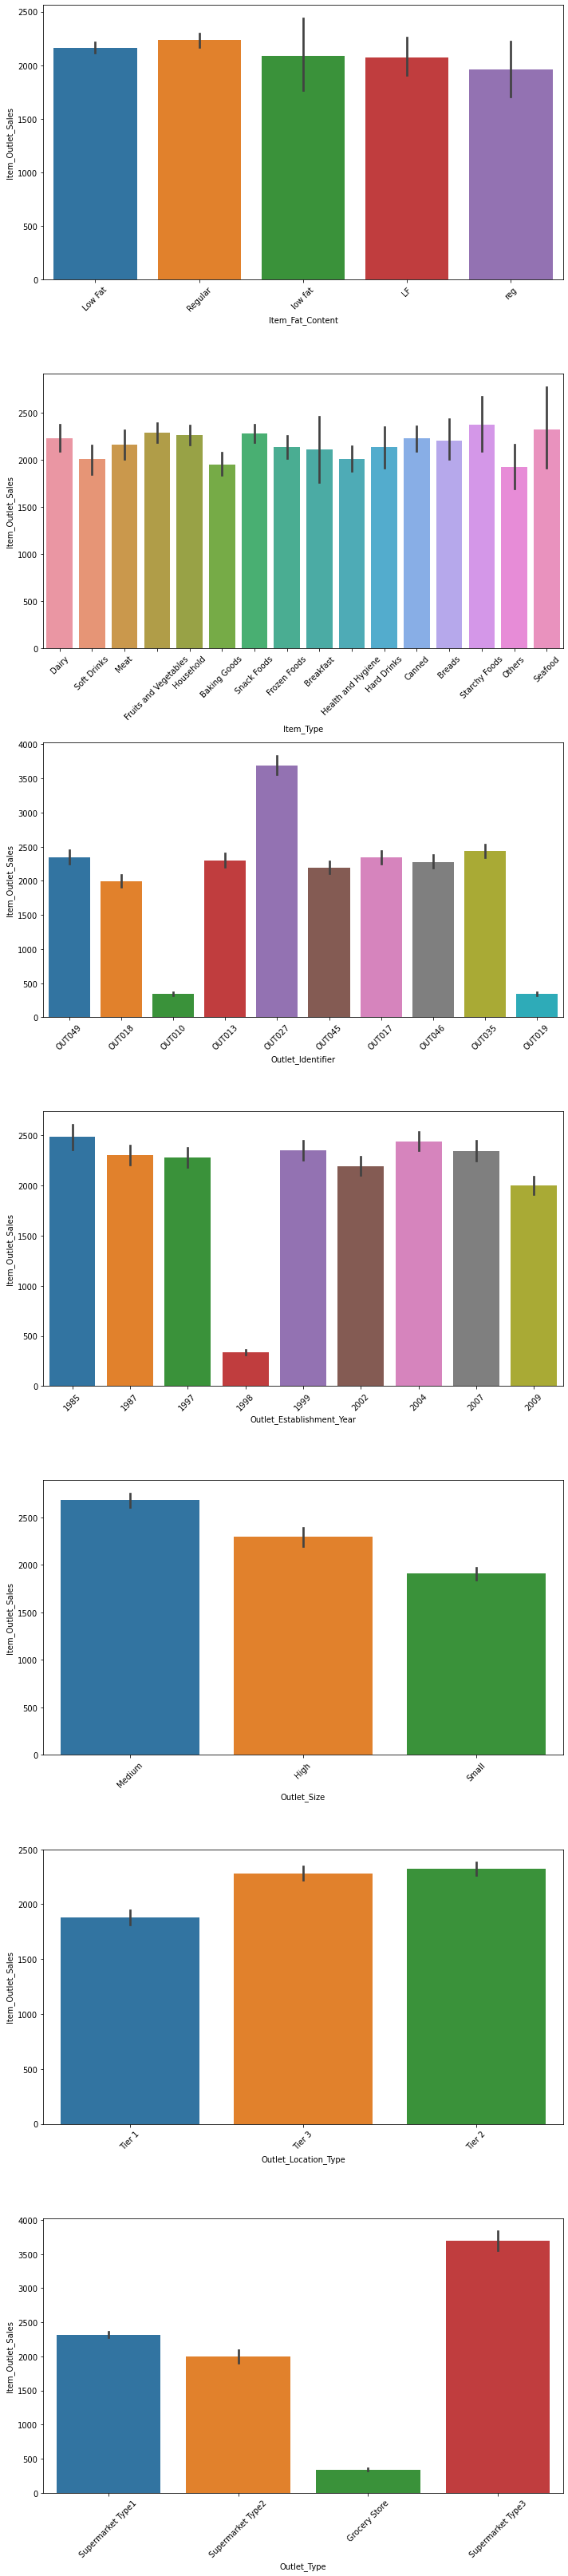

In [467]:
#ploating countplpot for all column with Item_Outlet_Sales 
plt.figure(figsize=(10,50))
c=['Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']
for i,col in enumerate(c):
    plt.subplot(8,1,i+1)
    sn.barplot(x=col,y='Item_Outlet_Sales',data=dftrain)
    plt.xticks(rotation=45)
    plt.tight_layout()

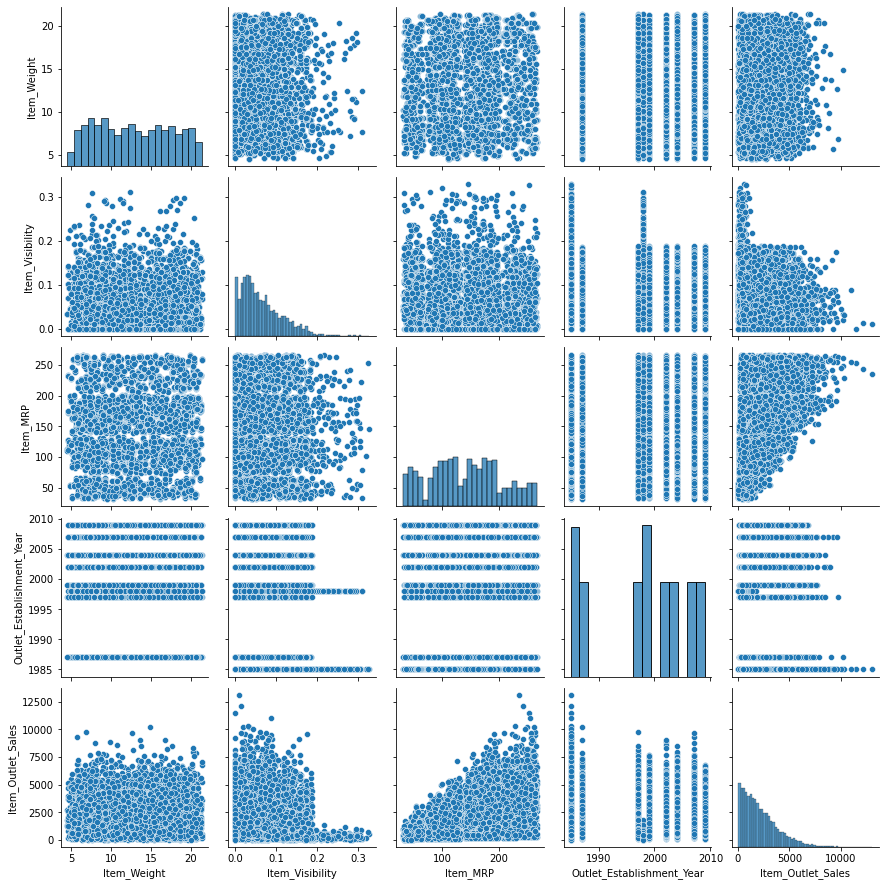

In [468]:
#ploting pair plot for our data set
sn.pairplot(dftrain)

## Multi variate analysis

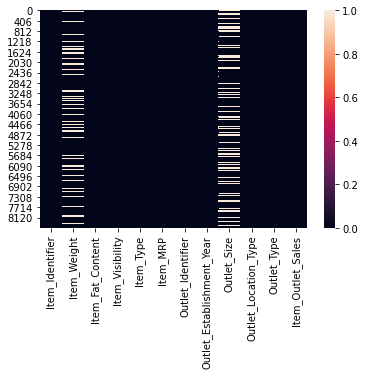

In [469]:
#ploting heat map to see wheather null value is present or not
sn.heatmap(dftrain.isnull())

In [470]:
#seeing correlation of each parameter with label column
df_Cor=dftrain.corr()
df_Cor

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


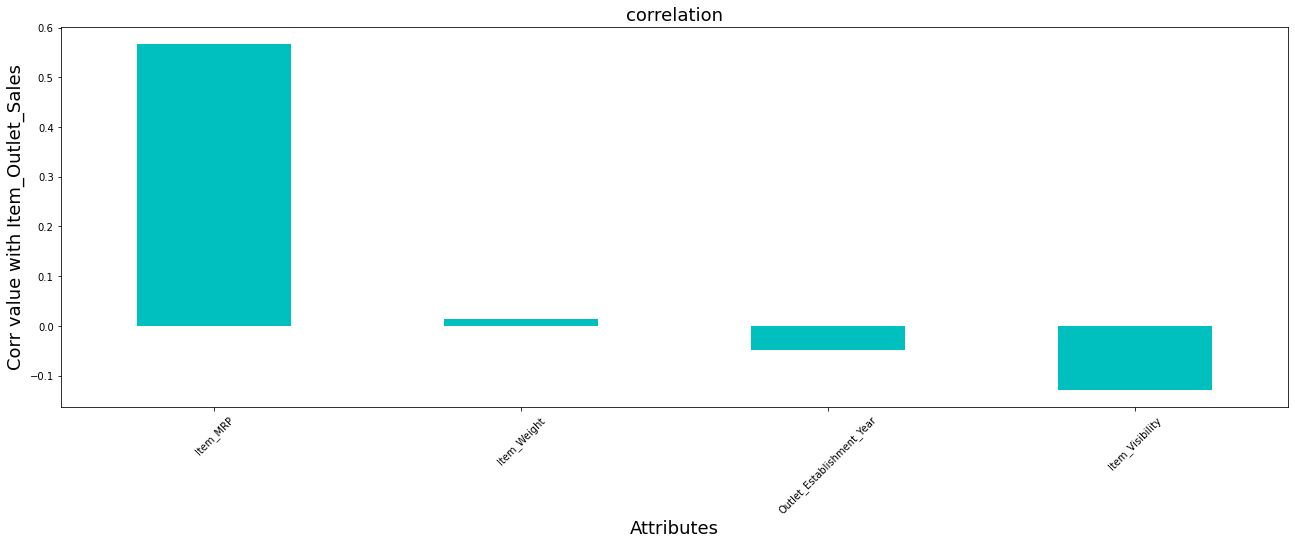

In [471]:
#seeing correlation of each parameter with label column
plt.figure(figsize=(22,7))
dftrain.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xticks(rotation=45)
plt.xlabel('Attributes',fontsize=18)
plt.ylabel('Corr value with Item_Outlet_Sales',fontsize=18)
plt.title('correlation',fontsize=18)
plt.show()

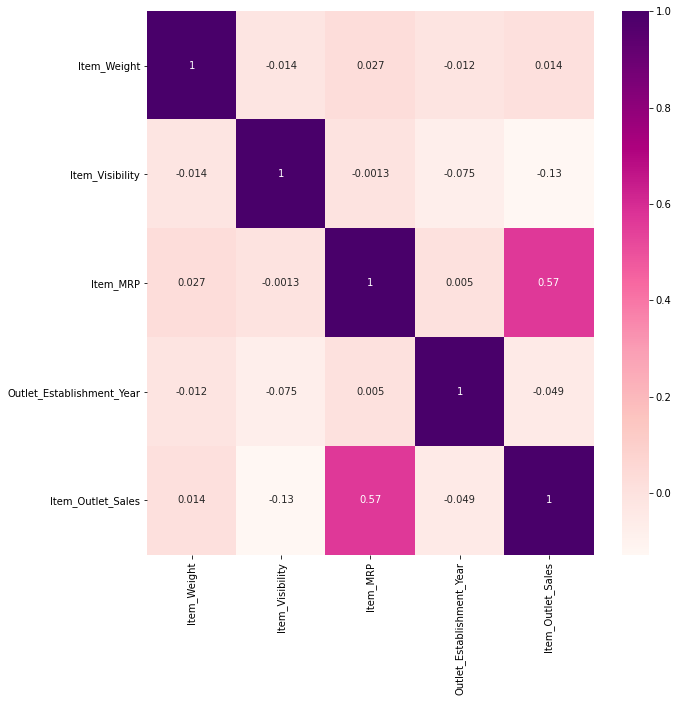

In [472]:
#ploting heat map for correlation matrix
plt.figure(figsize=(10,10))
sn.heatmap(df_Cor,annot=True,cmap='RdPu')

## Data cleaning

## Filling the missing value

In [473]:
#Filling the missing value of Item weight column with there mean with respective to their Item_Identifier class  
i_w_m=dftrain.pivot_table(values='Item_Weight',index='Item_Identifier')
miss_bool=dftrain['Item_Weight'].isnull()

In [474]:
for i,item in enumerate(dftrain['Item_Identifier']):
  if miss_bool[i]==True:
    if item in i_w_m:  
      dftrain['Item_Weight'][i]=i_w_m.loc[item]['Item_Weight']
    else:
      dftrain['Item_Weight'][i]=0

In [476]:
#Filling the missing value of Outlet size column with there mode with respective to their Outlet Type class  
o_s_m=dftrain.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
miss_bool=dftrain['Outlet_Size'].isnull()
dftrain.loc[miss_bool,'Outlet_Size']=dftrain.loc[miss_bool,'Outlet_Type'].apply(lambda x:o_s_m[x])
o_s_m

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [477]:
  #Filling 0 with the means for column Item_Visibility 
  dftrain["Item_Visibility"]=dftrain["Item_Visibility"].replace(0,dftrain['Item_Visibility'].mean())

In [479]:
#Replacing miss entered value
dftrain['Item_Fat_Content']=dftrain["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

## Removing skewness

In [482]:
#checking skewness in numerical column
for i in a:
  print(i , dftrain[i].skew())

Item_Weight -0.27596333973067166
Item_Visibility 1.2868767983596106
Item_MRP 0.1272022683110526
Outlet_Establishment_Year -0.39664078591550556
Item_Outlet_Sales 1.1775306028542798


In [483]:
#romoving using boxcox
from scipy.stats import boxcox
dftrain['Item_Visibility']=boxcox(dftrain['Item_Visibility'],0)

## PCA

In [484]:
#Reducing the range of the column Outlet_Establishment_Year
dftrain['Year_Esta']=2013-dftrain['Outlet_Establishment_Year']

In [485]:
#Droping the column Outlet_Establishment_Year
dftrain.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [486]:
#Creating the new column New_Item_Type
dftrain['New_Item_Type'] = dftrain['Item_Identifier'].apply(lambda x: x[:2])
dftrain['New_Item_Type']

0       FD
1       DR
2       FD
3       FD
4       NC
        ..
8518    FD
8519    FD
8520    NC
8521    FD
8522    DR
Name: New_Item_Type, Length: 8523, dtype: object

In [487]:
#Droping the column Outlet_Establishment_Year
dftrain.drop('Item_Identifier',axis=1,inplace=True)

## Encoding

In [488]:
#Encoding the columns 'Item_Fat_Content','Item_Type','Outlet_Identifier' ,'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'
dftrain = pd.get_dummies(dftrain, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier' ,'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
dftrain.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Year_Esta,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_DR,New_Item_Type_FD,New_Item_Type_NC
0,9.30,-4.132215,249.8092,3735.1380,14,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
1,5.92,-3.948780,48.2692,443.4228,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0
2,17.50,-4.088756,141.6180,2097.2700,14,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
3,19.20,-2.716102,182.0950,732.3800,15,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
4,8.93,-2.716102,53.8614,994.7052,26,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1


## outlier treatment 

In [489]:
#Removing outlier by Z score method
df=dftrain
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("Before removing outliers::",dftrain.shape)
print("After removing outliers::",df.shape)
p=100-(len(df.index)/len(dftrain.index)*100)
print(f'We are loosing {p} % of data.   ')

Before removing outliers:: (8523, 46)
After removing outliers:: (3627, 46)
We are loosing 57.444561774023235 % of data.   


## Creating X and Y

In [490]:
#spliting into X and Y
x=dftrain.drop(['Item_Outlet_Sales'],axis=1)
y=dftrain['Item_Outlet_Sales']

# Model building

In [492]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

##Selecting best random state

In [493]:
#selecting best random classifier
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    pred=mod.predict(x_test)
    r2=r2_score(y_test,pred)
    if r2>maxAccu:
        maxAccu=r2
        maxRS=i
print('Best accuracy is ',maxAccu,' on random state ',maxRS)

Best accuracy is  0.5803349700795417  on random state  60


In [494]:
#train, test, split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=60)

In [495]:
import warnings
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#LinearRegression

In [496]:
#building model using LinearRegression
lm=LinearRegression()
lm.fit(x_train,y_train)
pred=lm.predict(x_test)
r2=r2_score(y_test,pred)
print(r2)

0.5818110332527708


In [497]:
#cross validation of LinearRegression
print(cross_val_score(lm,x,y,cv=5).mean())

0.5587964887580299


#RandomForestRegressor

In [498]:
#building model using RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfg=RandomForestRegressor()
rfg.fit(x_train,y_train)
pred=rfg.predict(x_test)
r2=r2_score(y_test,pred)
print(r2)

0.581120135305516


In [499]:
#cross validation of RandomForestRegressor
print(cross_val_score(rfg,x,y,cv=5).mean())

0.5509362869408306


#DecisionTreeRegressor

In [500]:
#building model using DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred=dtr.predict(x_test)
r2=r2_score(y_test,pred)
print(r2)

0.20067275360057069


In [501]:
#cross validation of DecisionTreeRegressor
print(cross_val_score(dtr,x,y,cv=5).mean())

0.16945232885229577


# ExtraTreesRegressor

In [502]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred=etr.predict(x_test)
r2=r2_score(y_test,pred)
print(r2)

0.5272155246019151


In [503]:
#cross validation of DecisionTreeRegressor
print(cross_val_score(etr,x,y,cv=5).mean())

0.5071411344480778


Selecting Random forest as best model and carring out Hyper parameter on that

##HYPER PARAMETER TUNING

In [518]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_test,y_test)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'auto'}


In [519]:
#tuning on RandomForestRegressor
Final_mod=RandomForestRegressor(criterion='mae',max_features='auto')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
r2=r2_score(y_test,pred)
print(r2)

0.5774683843304887


In [520]:
#cross validation of RandomForestRegressor
print(cross_val_score(Final_mod,x,y,cv=5).mean())

0.5558254329267746


Not Satisfied with hyper parameter tuning So going with old random forest model

## Saving the Model

In [521]:
#saving the model
import joblib
joblib.dump(rfg,'FinalModel.pkl')

['FinalModel.pkl']

# Predicting testing data set

In [ ]:
#Carring out all the featuring engineering on to test data set 

In [504]:
dftest=pd.read_csv('bigdatamartsales_test.csv')

In [505]:
dftest.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [506]:
i_w_m=dftest.pivot_table(values='Item_Weight',index='Item_Identifier')
miss_bool=dftest['Item_Weight'].isnull()

In [507]:
for i,item in enumerate(dftest['Item_Identifier']):
  if miss_bool[i]==True:
    if item in i_w_m:  
      dftest['Item_Weight'][i]=i_w_m.loc[item]['Item_Weight']
    else:
      dftest['Item_Weight'][i]=0

In [508]:
o_s_m=dftest.pivot_table(values='Outlet_Size',columns='Outlet_Type',aggfunc=(lambda x: x.mode()[0]))
miss_bool=dftest['Outlet_Size'].isnull()
dftest.loc[miss_bool,'Outlet_Size']=dftest.loc[miss_bool,'Outlet_Type'].apply(lambda x:o_s_m[x])
o_s_m

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [509]:
  dftest["Item_Visibility"]=dftest["Item_Visibility"].replace(0,dftest['Item_Visibility'].mean())

In [510]:
dftest['Item_Fat_Content']=dftest["Item_Fat_Content"].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

In [511]:
from scipy.stats import boxcox
dftest['Item_Visibility']=boxcox(dftest['Item_Visibility'],0)

In [512]:
dftest['Year_Esta']=2013-dftest['Outlet_Establishment_Year']

In [513]:
dftest.drop('Outlet_Establishment_Year',axis=1,inplace=True)

In [514]:
dftest['New_Item_Type'] = dftest['Item_Identifier'].apply(lambda x: x[:2])
dftest['New_Item_Type']

0       FD
1       FD
2       NC
3       FD
4       FD
        ..
5676    FD
5677    FD
5678    NC
5679    FD
5680    FD
Name: New_Item_Type, Length: 5681, dtype: object

In [515]:
dftest.drop('Item_Identifier',axis=1,inplace=True)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Year_Esta,New_Item_Type
0,20.750,Low Fat,-4.884245,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1,14,FD
1,8.300,Regular,-3.258977,Dairy,87.3198,OUT017,Small,Tier 2,Supermarket Type1,6,FD
2,14.600,Low Fat,-2.306845,Others,241.7538,OUT010,Small,Tier 3,Grocery Store,15,NC
3,7.315,Low Fat,-4.174142,Snack Foods,155.0340,OUT017,Small,Tier 2,Supermarket Type1,6,FD
4,0.000,Regular,-2.132005,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3,28,FD


In [517]:
dftest = pd.get_dummies(dftest, columns=['Item_Fat_Content','Item_Type','Outlet_Identifier' ,'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'New_Item_Type'])
dftest.head()

,Item_Weight,Item_Visibility,Item_MRP,Year_Esta,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,New_Item_Type_DR,New_Item_Type_FD,New_Item_Type_NC
0,20.750,-4.884245,107.8622,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,1,0
1,8.300,-3.258977,87.3198,6,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
2,14.600,-2.306845,241.7538,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1
3,7.315,-4.174142,155.0340,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0
4,0.000,-2.132005,234.2300,28,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0


In [523]:
#Predicting the value
x_test=dftest
y_pred=rfg.predict(x_test)

In [524]:
#Displaying the predicted values 
y_pred

array([1561.53403 , 1341.740134,  636.258454, ..., 1783.47846 ,
       4133.000106, 1390.643144])

In [526]:
#Storing the predicted values in dataframe
predicted_data=pd.DataFrame({'Item_Outlet_Sales':y_pred})

In [527]:
#Displaying the data frame
predicted_data

,Item_Outlet_Sales
0,1561.534030
1,1341.740134
2,636.258454
3,2173.577338
4,6557.577386
...,...
5676,2152.930880
5677,2834.204072
5678,1783.478460
5679,4133.000106


In [528]:
#Saving the predicted data frame
predicted_data.to_csv("Predicted_outlet_sales.csv",index=False)